<a href="https://colab.research.google.com/github/sherjahong1r/Machine-Learning-Lessons/blob/main/05_Polynomial_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **NON-LINEAR REGRESSION**

# **Polynomial Regression**

In [360]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/china_gdp.csv"

df = pd.read_csv(url)
df.head(10)

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10
5,1965,6.970915e+10
6,1966,7.587943e+10
7,1967,7.205703e+10
8,1968,6.999350e+10
9,1969,7.871882e+10


## Bu jadvalda Xitoy davlatining turli yillardagi YIM o'sishi tasvirlangan

In [361]:
df.shape

(55, 2)

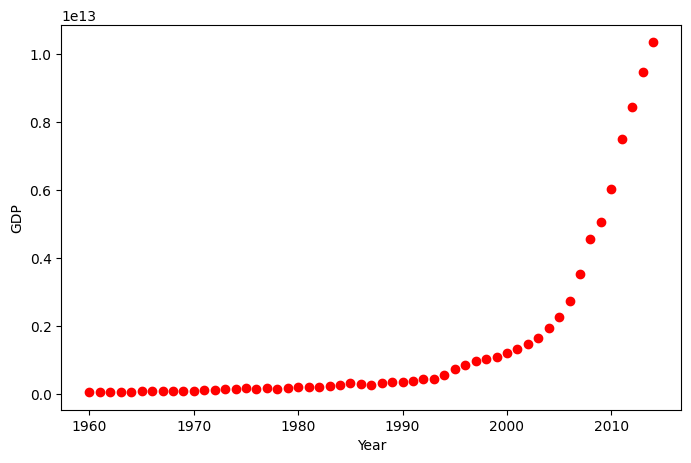

In [362]:
plt.figure(figsize=(8,5))
x_data, y_data = (df["Year"].values, df["Value"].values)
# Year ustuni qiymatlarini X o'qiga, Value ustuni qiymatlarini y o'qiga joylashtirildi
plt.plot(x_data, y_data, 'ro')  # 'ro' bu yerda nuqta nuqta va qizil bo'lishini taminlaydi agar u bo'lmaganda chiziqli bo'lardi
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

## Ma'lumotlarni ajratib olamiz

In [363]:
x = np.asanyarray(df[['Year']]/df.Year.max())
y = np.asanyarray(df[['Value']]/df.Value.max())

# Bu kod df nomli ma'lumotlar to'plamidan 'Year' va 'Value' ustunlarini olib,
# ularni normallashtiradi (ya'ni, qiymatlarni 0 va 1 oralig'iga keltiradi)
# va keyin ularni NumPy massivlariga aylantirib, x va y o'zgaruvchilariga saqlaydi.

In [364]:
x[:10]

array([[0.97318769],
       [0.97368421],
       [0.97418073],
       [0.97467726],
       [0.97517378],
       [0.97567031],
       [0.97616683],
       [0.97666336],
       [0.97715988],
       [0.97765641]])

In [365]:
y[:10]

array([[0.0057156 ],
       [0.00478589],
       [0.00450854],
       [0.00483806],
       [0.00570384],
       [0.00673204],
       [0.00732793],
       [0.00695878],
       [0.0067595 ],
       [0.00760213]])

## Linear regression

In [366]:
from sklearn.linear_model import LinearRegression
# LinearRegression (chiziqli regressiya) modelini import qiladi. Bu model chiziqli munosabatlarni o'rganish uchun ishlatiladi.
model = LinearRegression()
# Bu qator LinearRegression sinfining yangi obyektini (modelini) yaratadi. Endi bizda chiziqli regressiya algoritmi ishlatiladigan 'bo'sh' model bor.
model.fit(x, y)
#  Bu qator yaratilgan modelni x va y ma'lumotlari bilan 'o'qitadi' yoki 'moslashtiradi'.
# Boshqacha qilib aytganda, model x (yil ma'lumotlari) va y (GDP qiymatlari) o'rtasidagi eng yaxshi chiziqli munosabatni topishga harakat qiladi.

LinearRegression()

In [367]:
yhat = model.predict(x)
# Bu qator yhat nomli o'zgaruvchiga, oldinroq o'qitilgan model (chiziqli regressiya modeli)
# yordamida x (yil ma'lumotlari) asosida bashorat qilingan qiymatlarni (ya'ni, kutilyotgan GDP qiymatlarini) saqlaydi.

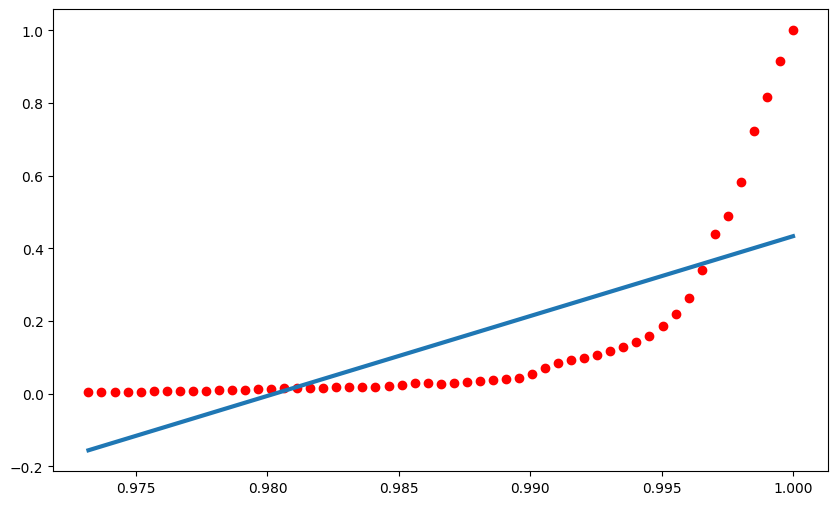

In [368]:
plt.figure(figsize=(10,6))
plt.plot(x, y, 'ro', label='data')
# x: X o'qi bo'yicha qiymatlar (normallashtirilgan yillar).
# y: Y o'qi bo'yicha qiymatlar (normallashtirilgan GDP).
# 'ro': Bu belgilar nuqtalarning rangini (qizil - 'r') va shaklini (dumaloq - 'o') bildiradi.
# label='data': Bu chiziqqa 'data' deb nom beradi, bu esa legendada ko'rsatiladi.
plt.plot(x, yhat, linewidth=3.0, label='fit')
# x: X o'qi bo'yicha bir xil qiymatlar.
# yhat: Model tomonidan bashorat qilingan Y o'qi qiymatlari.
# linewidth=3.0: Chiziq qalinligini 3.0 ga o'rnatadi.
# label='fit': Bu chiziqqa 'fit' deb nom beradi, bu esa legendada ko'rsatiladi.
plt.show()

## Bu yerda qizil chiziq asl grafik, ko'k to'g'ri chiziq esa biz bashorat qilgan grafik, hamda pastda MAE ni hisobladik va hatolik 0.12 chiqdi yani biroz katta hatolik

In [369]:
from sklearn.metrics import mean_absolute_error

print("MAE:", mean_absolute_error(yhat,y))
# Bu funksiya "Mean Absolute Error" (MAE) ni hisoblaydi. MAE bashorat qilingan qiymatlar
# (yhat) va haqiqiy qiymatlar (y) orasidagi o'rtacha mutlaq farqni bildiradi.

MAE: 0.12657979406214762


## Bu xato kattaroq chiqishining sababi LinearRegression da bashorat qildik.

## Pastda esa Polynomial Regressionda bashorat qilamiz qaytadan

In [370]:
x[0]
# Bu yil ustuning 0 indexdagi qiymati yuqorida uni normalizatsiya qilganimiz uchun 0 butun deb chiqadi
# Yani Max qiymatiga bo'lib ihchamlashtirganmiz

array([0.97318769])

# **Polynomial** **regression**

Polynomial regression (Polinomial regressiya) — bu chiziqli regressiyaning bir turi bo'lib, u mustaqil o'zgaruvchi x va bog'liq o'zgaruvchi y o'rtasidagi munosabatni n-darajali polinom yordamida modellashtiradi. Oddiy chiziqli regressiyada biz y = b0 + b1*x kabi to'g'ri chiziq bilan munosabatni tasvirlasak, polinomial regressiyada esa:

y = b0 + b1*x + b2*x^2 + ... + bn*x^n

ko'rinishdagi egri chiziqdan foydalanamiz. Bu, ma'lumotlar to'g'ri chiziqli munosabatga ega bo'lmaganda, aniqroq bashorat qilish imkonini beradi. Yuqoridagi misolda df ma'lumotlariga Linear regression modelini qo'llaganimizda, xato ancha yuqori edi, lekin Polynomial regression modelini qo'llaganimizda, xato sezilarli darajada kamaydi, bu esa ma'lumotlar orasida chiziqli bo'lmagan bog'liqlik borligini ko'rsatadi.

In [371]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=5, include_bias=False)
X_poly = poly_features.fit_transform(x)

# bu kod xdagi yillarni x, x^2, x^3, x^4, x^5 kabi yangi 'xususiyatlar'ga aylantiradi.
# Bu, modelga chiziqli bo'lmagan bog'liqliklarni o'rganishga yordam beradi. Natija X_polyga saqlanadi.

In [372]:
X_poly[0]
# Bu yuqorida degree=5 qilganimiz uchun 5 ta qiymat mavjud yani x ning o'zi, kvadrati, kubi, va oxirida 5 darajasidagi qiymati
# Agar degree=10 qilsak 10 darajasigacha hisoblab 10 ta qiymat qaytaradi

array([0.97318769, 0.94709427, 0.92170048, 0.89698756, 0.87293725])

In [373]:
model.fit(X_poly, y)

LinearRegression()

In [374]:
yhat = model.predict(X_poly)

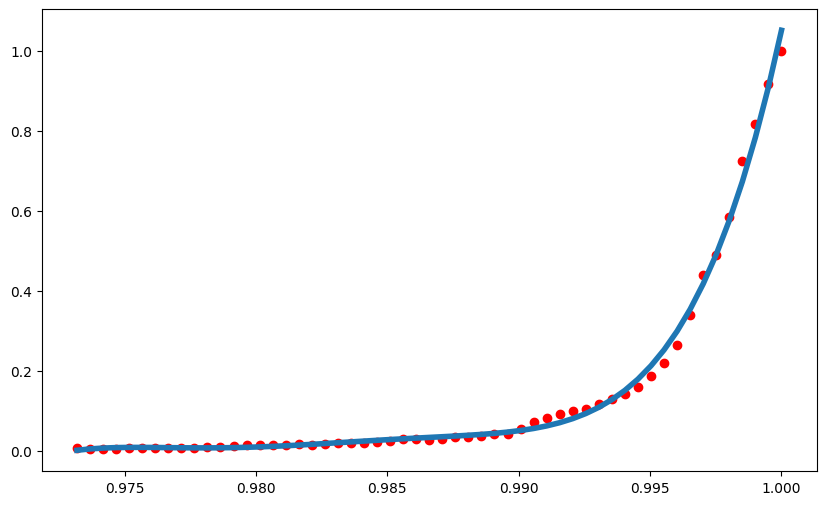

In [375]:
plt.figure(figsize=(10,6))
plt.plot(x, y, 'ro', label='data')
plt.plot(x,yhat, linewidth=4.0, label='fit')
plt.show()

## Demak bunda Polynomial Regressiondan foydalanganimiz uchun MAE xatolik ancha kamaydi yani 0.009 chiqdi. Yuqoridagi LinearRegressionga nisbatan xatolar ancha kam.

In [376]:
print("MAE:", mean_absolute_error(yhat,y))

MAE: 0.009253921906050316


## Agar biz Polynomial darajasini yani degree ni qancha oshirib borsak xato ham shuncha kamayib boradi agar degree=5 emas degree=100 qilganimizda xato deyarli bo'lmasdi.

## Lekin buning kamchilik tomoni mavjud yani biz bunda train_set va test_set ga ajratmadik yani faqat train_set bilan ishlayabmiz keyinchalik test_set qilganimizda hatolik bilan ishlashi mumkin yani haddan tashqari shu train_set ga o'rganib qolib yangi ma'lumotlar bilan ishlay olmasligi mumkin va bu o'z navbatida Overfitting muamosini olib keladi.

## Overfitting - bu train_set bilan zo'r ishlaydi ammo test_set yani real ma'lumotlar bilan ishlaganda xato ishlashiga aytiladi yani train_set ga moslashib qolgan bo'ladi.

# **Pipeline**

In [377]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ('poly_features', PolynomialFeatures(degree=10, include_bias=False)),
    ('model', LinearRegression())
])

polynomial_regression.fit(x_train, y_train)

# train_test_split: x (yillar) va y (YIM qiymatlari) ma'lumotlarini o'quv (x_train, y_train)
# va test (x_test, y_test) to'plamlariga ajratadi. Bu modelni baholash uchun muhim.
# Pipeline: Bir nechta ketma-ket qadamlarni bitta ob'ektga birlashtirish imkonini beradi. Bu yerda ikki qadam bor:
# PolynomialFeatures(degree=5, include_bias=False): x_train dagi yillarni x, x^2, x^3, x^4, x^5 kabi
# yangi "xususiyatlar"ga aylantiradi. Bu modelga chiziqli bo'lmagan bog'liqliklarni o'rganishga yordam beradi.
# LinearRegression(): Polinomial xususiyatlarga ega ma'lumotlar asosida chiziqli regressiya modelini yaratadi.
# polynomial_regression.fit(x_train, y_train): Yuqorida yaratilgan pipeline'ni x_train va y_train ma'lumotlari
# asosida o'qitadi, ya'ni model parametrlarni o'rganadi. Natijada, yillar va YIM o'rtasidagi polinomial bog'liqlikni aks ettiruvchi model hosil bo'ladi.


Pipeline(steps=[('poly_features',
                 PolynomialFeatures(degree=10, include_bias=False)),
                ('model', LinearRegression())])

In [378]:
X_poly[0]


array([0.97318769, 0.94709427, 0.92170048, 0.89698756, 0.87293725])

In [379]:
y_predict = polynomial_regression.predict(x_test)

In [380]:
MAE = mean_absolute_error(y_test, y_predict)
print("MAE:", MAE)
# Pipeline dan foydalanganimizda xatolik 0.005 chiqdi
# Yuqorida uning degree sini 10 qilganmiz

MAE: 0.007808347080862008


# **NEW SECTION**

## `curve_fit`
'curve_fit' yordamida o'zimiz yozgan funksiyalar asosida model qurishimiz mumkin.

Misol uchun, yuqoridagi ma'lumotlar Logistic regression funksiyasi yordamida aniqroq bashorat qilinishi mumkin.

# $$ \hat{Y} = \frac1{1+e^{-\beta_1(X-\beta_2)}}$$

Keling, logisti regression funksiyasini yozib olamiz:

In [381]:
x_data, y_data = (df["Year"].values, df["Value"].values)
xdata =x_data/max(x_data)
ydata =y_data/max(y_data)
# Normalizatsiya qilindi

In [382]:
def sigmoid(x, Beta_1, Beta_2):
     y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
     return y

# Bu yuqoridagi formula asosida yozildi

# x: Kirish qiymati (odatda yil kabi mustaqil o'zgaruvchi).
# Beta_1: Funksiyaning egilish tezligini (steepness) boshqaruvchi parametr.
# Beta_2: Funksiyaning egilish nuqtasini (midpoint) boshqaruvchi parametr.
# Ushbu formulada np.exp() funksiyasi e sonining berilgan darajasini hisoblaydi. Natijada y qiymati har doim 0 va 1 oralig'ida bo'ladi.

In [383]:
from scipy.optimize import curve_fit

beta, pcov = curve_fit(sigmoid, xdata, ydata)
print(f"beta1={beta[0]}\nbeta2={beta[1]}")

# Ushbu kod scipy.optimize kutubxonasidagi curve_fit funksiyasidan foydalanib, berilgan sigmoid
# funksiyasining parametrlarini (Beta_1 va Beta_2) xdata va ydata ma'lumotlariga moslaydi (fit qiladi).

beta1=690.4517083847173
beta2=0.9972071272536834


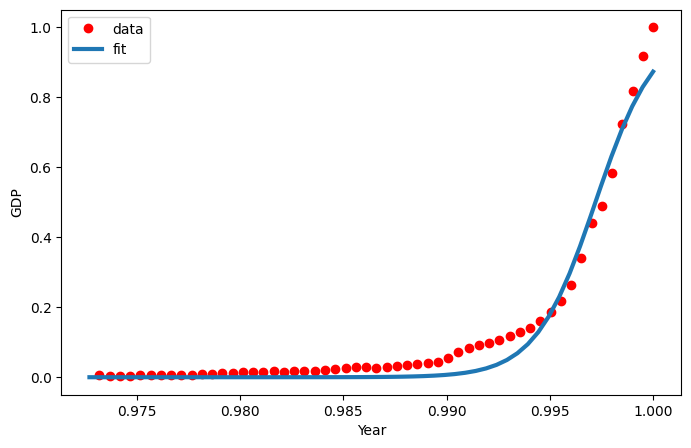

In [384]:
x = np.linspace(1960, 2015, 55)
x = x/max(x)
plt.figure(figsize=(8,5))
yhat = sigmoid(x, *beta)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,yhat, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

In [385]:
print("MAE:", mean_absolute_error(yhat,ydata))

MAE: 0.030498418817641204
